# Método de la matriz inversa para la regresión lineal ...

$$Ax = b$$

$$A^TAx = A^Tb$$

$$x = (A^TA)^{-1}A^Tb$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
session = tf.Session()

In [4]:
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

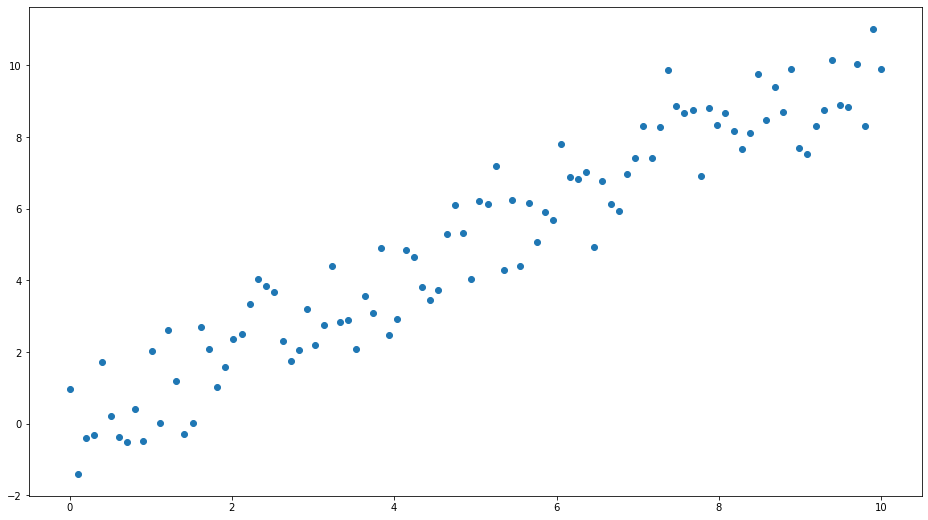

In [7]:
plt.figure(figsize = (16, 9))
plt.plot(x_vals, y_vals, "o", label = "Datos")
plt.show()

In [10]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [12]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [13]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)
solution_eval = session.run(solution)

In [14]:
solution_eval

array([[ 1.03511958],
       [-0.13899633]])

In [16]:
slope = solution_eval[0][0]
intercept = solution_eval[1][0]
print(str(np.round(slope, 3)) + "x + " + str(np.round(intercept, 3)))

1.035x + -0.139


In [17]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + intercept)

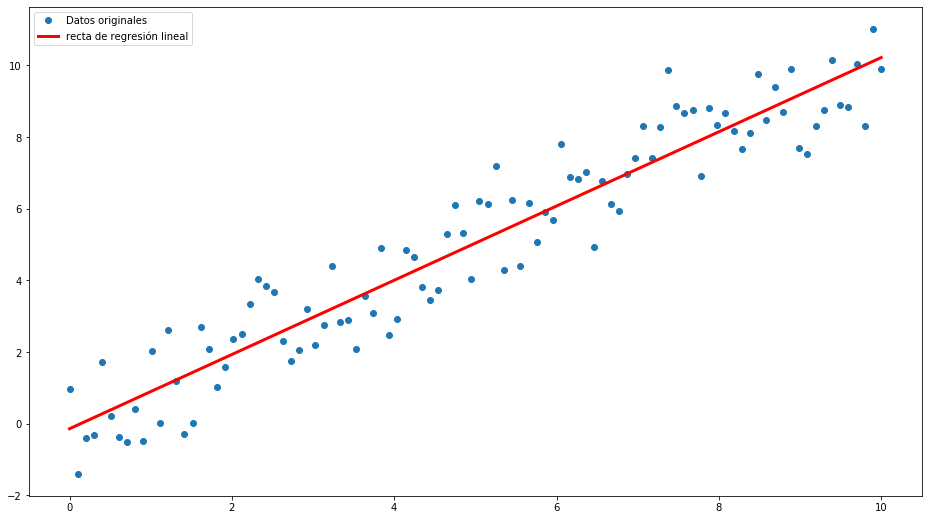

In [20]:
plt.figure(figsize = (16, 9))
plt.plot(x_vals, y_vals, "o", label = "Datos originales")
plt.plot(x_vals, best_fit, "r-", label = "recta de regresión lineal", linewidth = 3)
plt.legend(loc = "upper left")
plt.show()

# Método de la descomposición de Cholesky ...

$$A = LU$$
- $L$: matriz triangular superior
- $U$: matriz triangular inferior
- $L^T = U$

$$Ax = b$$

$$A^TAx = A^Tb$$

$$LUx = A^Tb$$

$$Ly = A^Tb$$
$$Ux = y$$

In [21]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [22]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [23]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A_tensor), b_tensor)
y_sol = tf.matrix_solve(L, tA_b)
x_sol = tf.matrix_solve(tf.transpose(L), y_sol)

In [24]:
sol_eval = session.run(x_sol)

In [25]:
sol_eval

array([[ 1.03511958],
       [-0.13899633]])

In [27]:
slope = sol_eval[0][0]
intercept = sol_eval[1][0]
print(str(np.round(slope, 3)) + "x + " + str(np.round(intercept, 3)))

1.035x + -0.139


In [29]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + intercept)

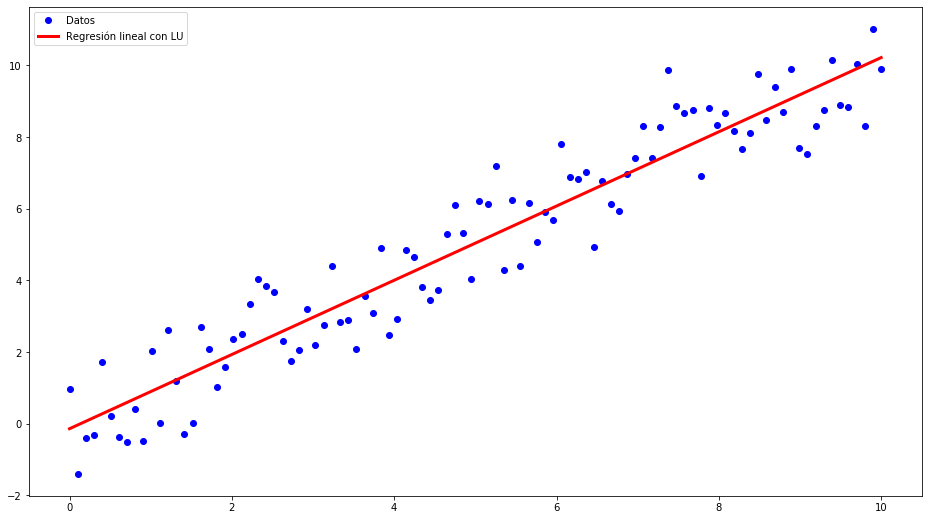

In [32]:
plt.figure(figsize = (16, 9))
plt.plot(x_vals, y_vals, "bo", label = "Datos")
plt.plot(x_vals, best_fit, "r-", label = "Regresión lineal con LU", linewidth = 3)
plt.legend(loc = "upper left")
plt.show()